<a href="https://colab.research.google.com/github/SutapaNayak/Linear-regression/blob/main/Task1_Prediction_using_Supervised_ML_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task-1: Prediction using Supervised ML

# The Sparks Foundation

##Sutapa Nayak

Task1-Predict the percentage of an student based on the no. of study hours.What will be predicted score if a student studies for 9.25 hrs/ day?

In [1]:
## import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## import dataset
from google.colab import files
uploaded=files.upload()

Saving StudentHoursScores.csv to StudentHoursScores.csv


In [3]:
##read the dataset
dataset=pd.read_csv("StudentHoursScores.csv")

In [4]:
print(dataset)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [5]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [7]:
dataset.tail(5)

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [8]:
dataset.columns

Index(['Hours', 'Scores'], dtype='object')

In [9]:
dataset.shape

(25, 2)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [11]:
dataset.min()

Hours      1.1
Scores    17.0
dtype: float64

In [12]:
dataset.max()

Hours      9.2
Scores    95.0
dtype: float64

In [13]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [14]:
## to see 2nd to before 6th row
dataset.iloc[2:6]

,Hours,Scores
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20


In [15]:
dataset.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [17]:
dataset.nunique()

Hours     23
Scores    23
dtype: int64

##Visualization 

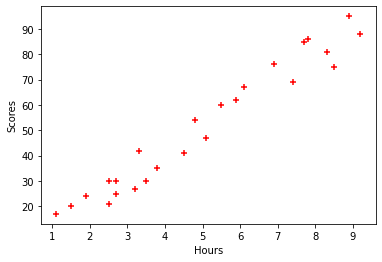

In [18]:
x=dataset['Hours']
y=dataset['Scores']
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.scatter(x,y,color='red',marker='+')
plt.show()

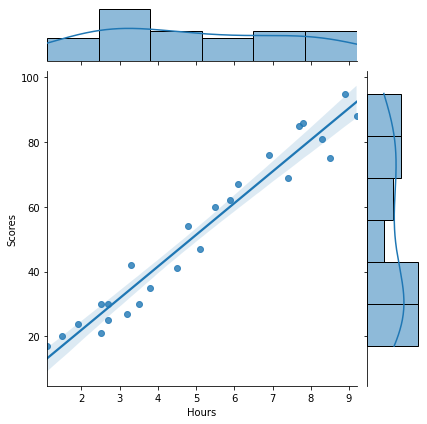

In [34]:
import seaborn as sns
sns.jointplot(data=dataset, x='Hours', y = 'Scores', kind='reg')

##Spliting of dataset in test and training

In [19]:
##iloc is accesing all the elemnts,dont know column name, by index
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
print(x)## features can be multidimesional
print(y)## but output must be one D array



[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=4,test_size=0.25)

In [22]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()##y=a+bx
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
x_train.shape

(18, 1)

##Predictions

In [24]:
y_predict=model.predict(x_test)

In [25]:
#difference between y_test and y_predict
y_predict

array([40.53206367, 50.49576518, 27.57925172, 87.36146074, 47.50665472,
       79.39049954, 94.33605179])

In [26]:
y_test

array([35, 54, 21, 75, 41, 85, 88])

In [27]:
model.predict([[9.25]])

array([94.83423687])

In [28]:
model.coef_

array([9.9637015])

In [29]:
model.intercept_

2.669997957227487

In [33]:
#Cross check manually
#Formula y=mx+c
9.9637015*9.25+2.669997957227487

94.8342368322275

# Evaluation of Model

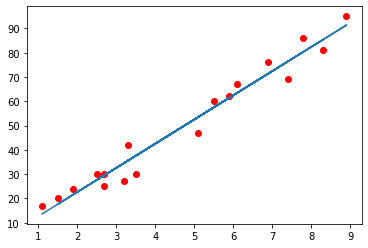

In [30]:
plt.scatter(x_train,y_train,color="red")
plt.plot(x_train,model.predict(x_train))
plt.show()

In [31]:

from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.9142138409326498